---
# **Introduction**

  * **NAME  : JOHN KRISTIAN VIERI**
  * **BATCH : 11**

---

# **Query**

    SELECT limit_balance, sex, education_level, marital_status,
    age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6,
    bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5,
    bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5,
    pay_amt_6, default_payment_next_month 
    FROM `bigquery-public-data.ml_datasets.credit_card_default` 
    WHERE education_level NOT LIKE '5' and education_level NOT LIKE '6' and education_level NOT LIKE '0'and marital_status NOT LIKE '0'
    LIMIT 21978



---
# **Objective**

1.  Create a Classification model to predict default_payment_next_month using the dataset you have saved.

2.  **Answer the following questions:**


    1. What is the criterion parameter function in the Decision Tree? Explain one `criterion` that you understand!

    2. What is the function of `pruning` in the Tree model?

    3. How to choose the optimal `K` on KNN?

    4. Explain what you know about `Cross Validation`!

    5. Explain what you know about `Accuracy, Precision, Recall, F1 Score` !


---


# **About Feature Dataset**

        * sex
        Gender (1=male, 2=female)

        * education_level 
        Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

        * marital_status
         Marital status (1=married, 2=single, 3=others)

        1. pay_4			
        Repayment status in June, 2005 (scale same as above)	

        2. pay_5				
        Repayment status in May, 2005 (scale same as above)	

        3. pay_6				
        Repayment status in April, 2005 (scale same as above)	

        4. bill_amt_1			
        Amount of bill statement in September, 2005 (NT dollar)	

        5. bill_amt_2			
        Amount of bill statement in August, 2005 (NT dollar)	

        6. bill_amt_3			
        Amount of bill statement in July, 2005 (NT dollar)	

        7. bill_amt_4			
        Amount of bill statement in June, 2005 (NT dollar)	

        8. bill_amt_5			
        Amount of bill statement in May, 2005 (NT dollar)	

        9. bill_amt_6			
        Amount of bill statement in April, 2005 (NT dollar)	

        10. pay_amt_1			
        Amount of previous payment in September, 2005 (NT dollar)	

        11. pay_amt_2			
        Amount of previous payment in August, 2005 (NT dollar)	

        12. pay_amt_3			
        Amount of previous payment in July, 2005 (NT dollar)	

        13. pay_amt_4			
        Amount of previous payment in June, 2005 (NT dollar)	

        14. pay_amt_5			
        Amount of previous payment in May, 2005 (NT dollar)	

        15. pay_amt_6			
        Amount of previous payment in April, 2005 (NT dollar)	

        16. default_payment_next_month --- > `Target`

        * (1=yes, 0=no)



# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score # Import Cross_val Method
from sklearn.model_selection import GridSearchCV # To get best parameter from model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay # Evaluation Model

# Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Data/h8dsft_P1M1_John-Kristian-Vieri.csv')

In [4]:
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

In [5]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0


In [6]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In [7]:
# Get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

In [8]:
# Get data type information
df.dtypes

limit_balance                 int64
sex                           int64
education_level               int64
marital_status                int64
age                           int64
pay_0                         int64
pay_2                         int64
pay_3                         int64
pay_4                         int64
pay_5                         int64
pay_6                         int64
bill_amt_1                    int64
bill_amt_2                    int64
bill_amt_3                    int64
bill_amt_4                    int64
bill_amt_5                    int64
bill_amt_6                    int64
pay_amt_1                     int64
pay_amt_2                     int64
pay_amt_3                     int64
pay_amt_4                     int64
pay_amt_5                     int64
pay_amt_6                     int64
default_payment_next_month    int64
dtype: object

In [9]:
# Changing the data type that the object should be in categorical

df['sex'] = df['sex'].astype('object')
df['education_level'] = df['education_level'].astype('object')
df['marital_status'] = df['marital_status'].astype('object')
df['default_payment_next_month'] = df['default_payment_next_month'].astype('object')

In [10]:
# separate numeric and categorical columns

num_col = df.select_dtypes(include=np.number).columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()

## Numerical Feature Analysis

In [11]:
# Build Function to see distribution numeric columns.

def distribution_plots(df, variable):
    # Definite figure size
    plt.figure(figsize=(16, 4))

    # Define Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],kde=True ,bins=30)
    plt.title('Histogram')
    
    # Show Plots
    plt.show()

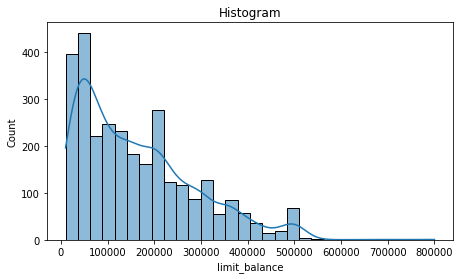

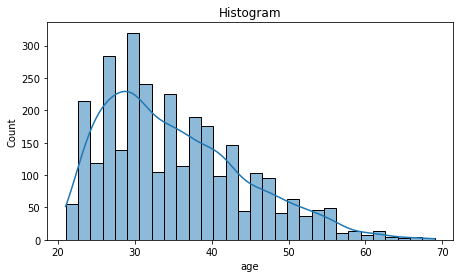

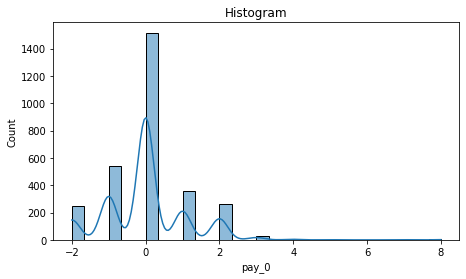

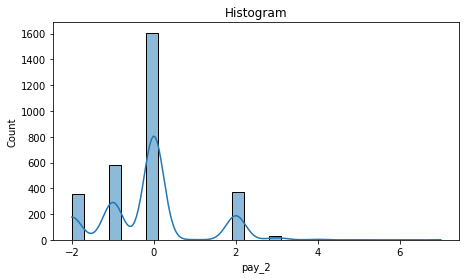

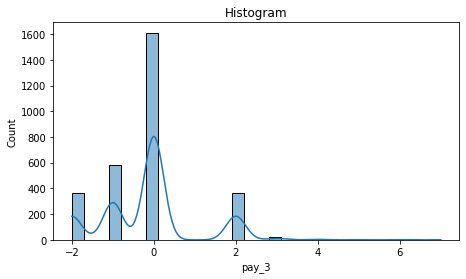

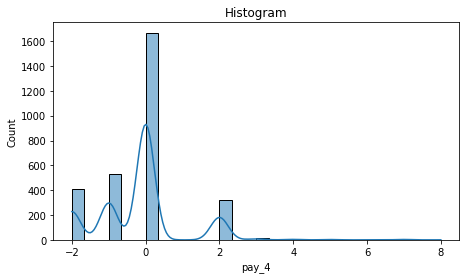

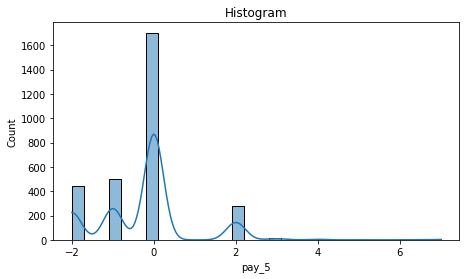

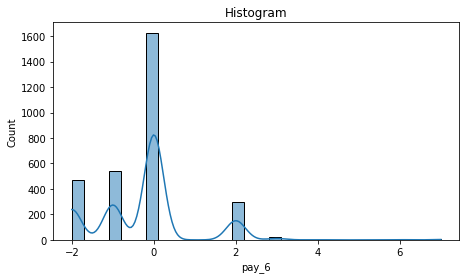

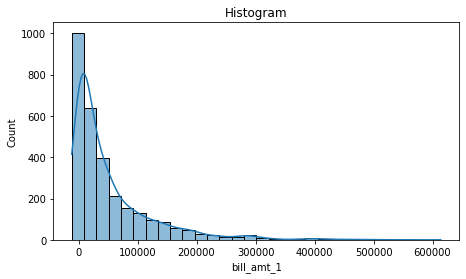

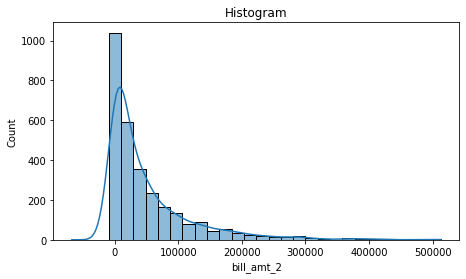

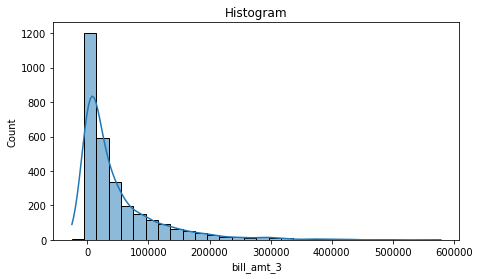

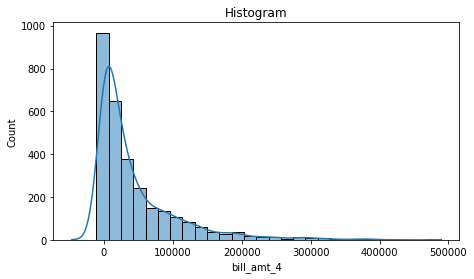

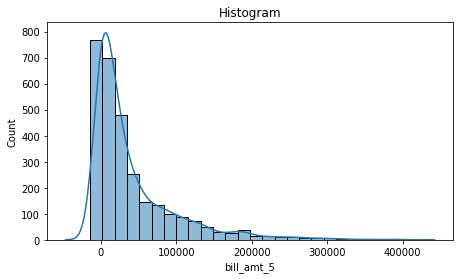

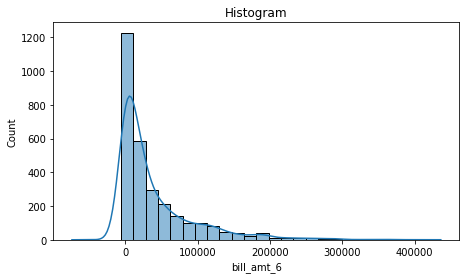

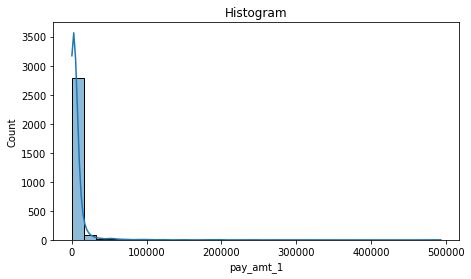

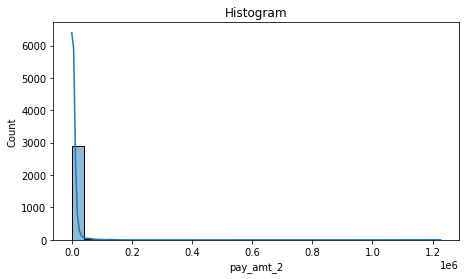

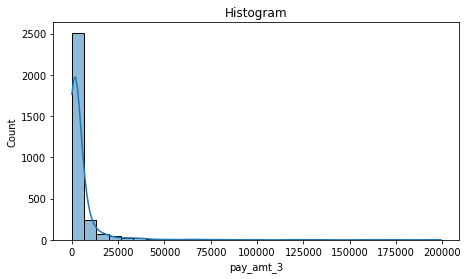

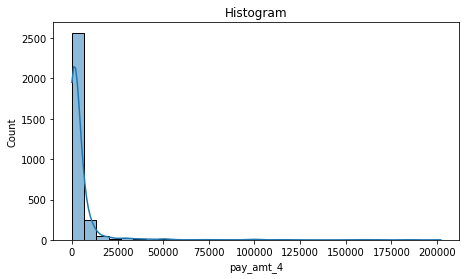

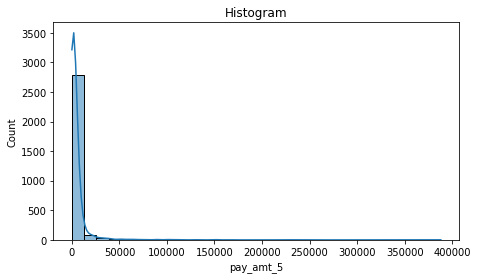

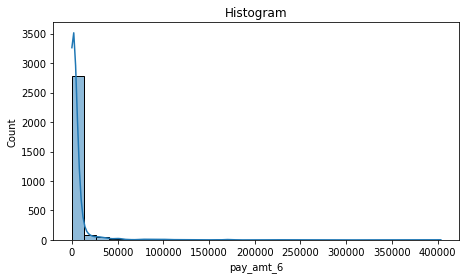

In [12]:
# Showin plot using loop
for columns in num_col:
  distribution_plots(df,columns)

----

### **RESULT**

* from the plotting above, we can get some information from the `age` and `limit_balance` features, that is :
    1. Based on the `age` feature, we can see if there are more candidates in the age of `20` to `50` years.

    2. Based on the `limit_balance` feature, we get if many candidates have balance limits below `100,000` 

----

## Cathegorical Feature Analysis

In [13]:
cat_col

['sex', 'education_level', 'marital_status', 'default_payment_next_month']

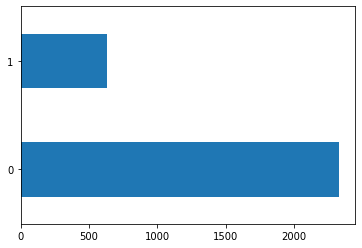

In [14]:
# candidates who pay next month
df['default_payment_next_month'].value_counts().plot(kind='barh');

### By gender

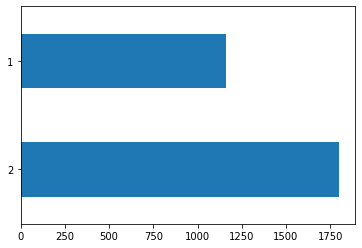

In [15]:
# Sex Feature
# 1 = Male 2 = Female
df['sex'].value_counts().plot(kind='barh');

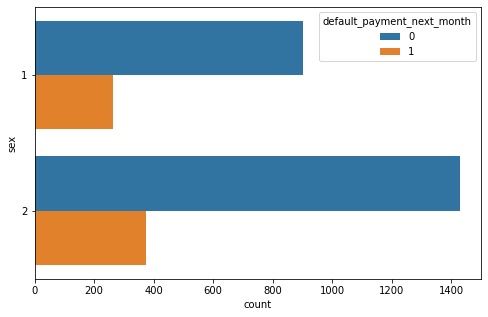

In [16]:
# comparison by grouping features with targets
plt.figure(figsize = (8,5)) 
sns.countplot(y = 'sex',hue = 'default_payment_next_month', data = df)
plt.show()

---

#### **RESULT** 

  1. From the plot above, it can be seen that most of the partisipan are female than male

  2. Based on gender with the target, information is obtained if male participants are only slightly compared to female participants who will pay next month.
---

### By Education Level

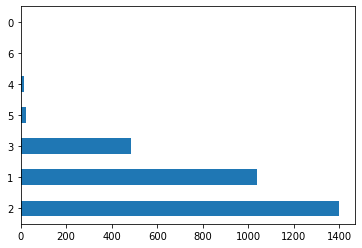

In [17]:
# Education Level Feature
# 1 = graduate school, 2 = university, 3 = high school, 4= others, 5 = unknown, 6 = unknown
df['education_level'].value_counts().plot(kind='barh');

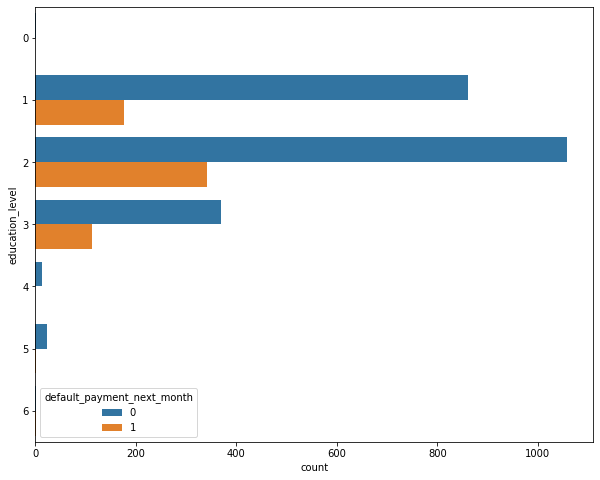

In [18]:
# comparison by grouping features with targets
plt.figure(figsize = (10,8)) 
sns.countplot(y = 'education_level',hue = 'default_payment_next_month', data = df)
plt.show()

---
#### **RESULT**

  1. From the plot based on the `education_level` feature, information is obtained that many participants have a bachelor's level of education or graduate from universities, followed by only regular school graduates and high school graduates.

  2. as expected, because most of the participants had a university education level, the participants who will not pay, and will pay next month are mostly participants who have university education, followed by participants who have regular school education, and high school graduates.

---

### By Marital Status

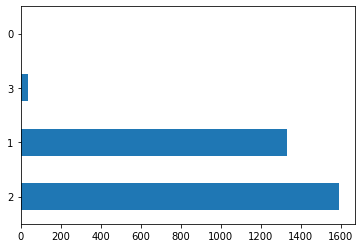

In [19]:
# Marital_status feature
# 1=married, 2=single, 3=others
df['marital_status'].value_counts().plot(kind='barh');

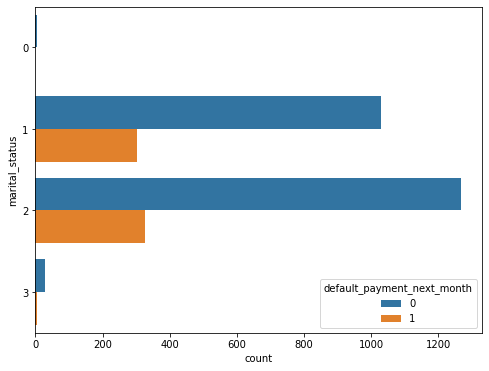

In [20]:
# comparison by grouping features with targets
plt.figure(figsize = (8,6)) 
sns.countplot(y = 'marital_status',hue = 'default_payment_next_month', data = df)
plt.show()

----


#### **RESULT**

  1. From the plotting above, it can be seen that there are more participants who have single status, compared to those who are married, followed by those whose status is not recognized.

  2. Based on `martial_status` against the target, information is obtained that participants who pay next month have a not too significant comparison between participants who are married and those who are still single, and it is clearly different from participants who do not pay next month.

----

----


### **CONCLUSION** 

1. Based on gender with the target, information is obtained if male participants are only slightly compared to female participants who will pay next month.

2. the participants who will not pay, and will pay next month are mostly participants who have university education, followed by participants who have regular school education, and high school graduates.

3.  Based on `martial_status` against the target, information is obtained that participants who pay next month have a not too significant comparison between participants who are married and those who are still single, and it is clearly different from participants who do not pay next month.

----

## Correlation Checking

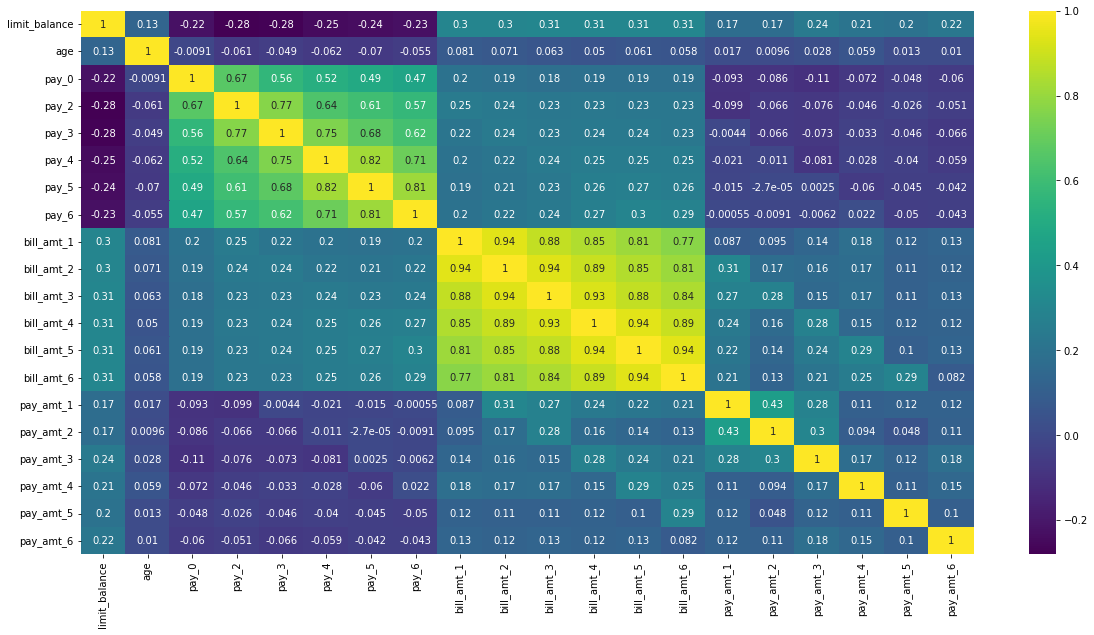

In [21]:
# Take a closer look at the correlation with the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True, cmap='viridis');

----

**RESULT**

* from the `pay` feature group, all of which are interdependent and highly correlated, it can be concluded that if some features can be removed, this condition is also experienced by the `bill_amt` feature group, and for the `pay_amt` feature group the features havent very correlation high or tend to be 'independent', it can be concluded if these features can be used for prediction of the target.

----

# Data Preprocessing

In [22]:
# return data type to integer to avoid error

df['default_payment_next_month'] = df['default_payment_next_month'].astype('int')

## Data Inference

In [23]:
# Create Inference of data with only needed features
df = df.drop(['pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6'], axis=1)
# Define inference data with 10 sample
df_inf = df.sample(10, random_state=20)
# Showin Data
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,bill_amt_1,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2498,200000,1,1,2,30,-1,6589,3449,2798,54271,7000,4000,6000,0
1817,50000,1,2,2,27,2,48655,460,5021,0,10000,2005,37,1
596,410000,2,1,2,31,0,134072,15003,15877,30000,14250,9971,27380,0
735,100000,1,1,2,30,0,100544,4511,3711,3685,2797,2897,3046,1
2135,310000,1,1,1,45,-2,8964,1174,6527,0,0,0,0,0
2646,20000,1,1,2,24,-1,390,390,390,780,0,0,0,0
14,230000,1,2,1,41,0,301038,9405,7769,7757,8030,6549,5226,1
1151,100000,1,5,1,38,0,101330,3824,4311,3648,3370,3492,3614,0
1251,50000,2,2,1,32,0,36062,1500,1847,1000,0,0,0,0
1912,20000,1,1,2,24,2,1891,4000,0,1000,0,1237,1000,1


In [24]:
# Remove Inference-Set from Dataset
df_train_test = df.drop(df_inf.index)
# Showin data 
df_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,bill_amt_1,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,47174,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,48088,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,78630,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,58180,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,42058,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,44100,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,280,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,0,2920,0,0,0,6753,0,1


## Feature Selection

In [25]:
# Separate between X (feature) and y (target) remove interdependent columns, to avoid overfitting

# Feature
X = df.drop(['default_payment_next_month'], axis=1)
# Target
y = df['default_payment_next_month']

## Split Data

In [26]:
# Split Train dan Test w/ test size 20 %

# Import Method
from sklearn.model_selection import train_test_split
# Define Method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
# Print Train
print('Train Size : ', X_train.shape)
# Print Test
print('Test Size  : ', X_test.shape)

Train Size :  (2372, 13)
Test Size  :  (593, 13)


In [27]:
# Get Numerical Columns and Categorical Columns

# Define Numeric Columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
# Define Cathegorical Columns
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Print Numerical Columns
print('Numerical Columns : ', num_columns)
# Print Cathegorical COlumns
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['limit_balance', 'age', 'pay_0', 'bill_amt_1', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns :  ['sex', 'education_level', 'marital_status']


## Data Cleaning

### Outlier

In [28]:
# Function to create histogram and boxplot.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Define Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Define Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    # Showin Plot
    plt.show()

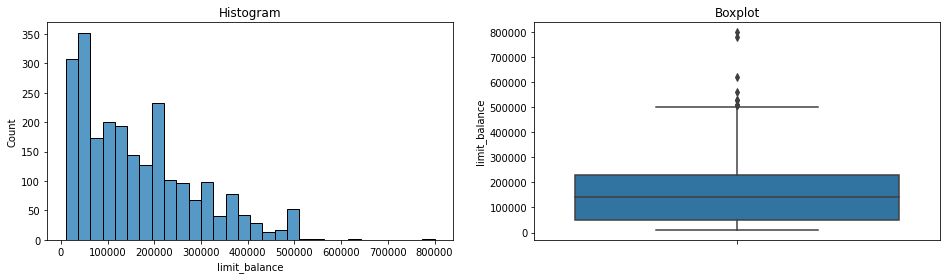

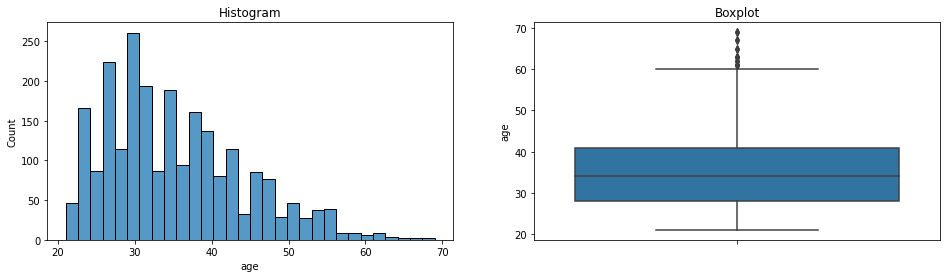

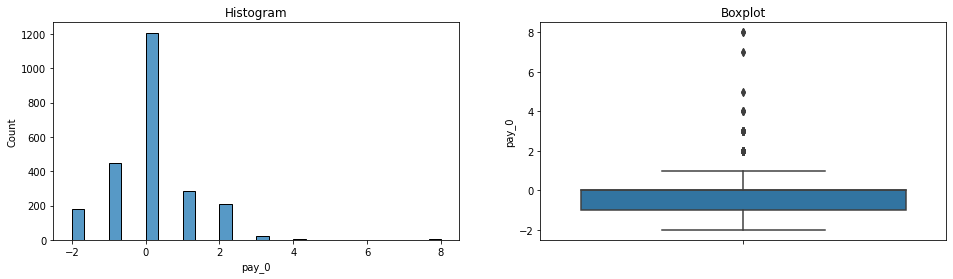

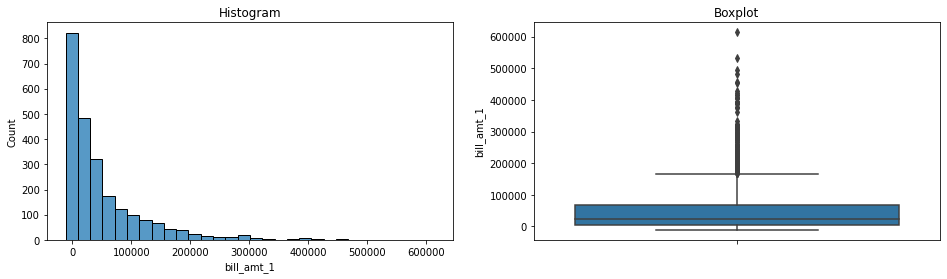

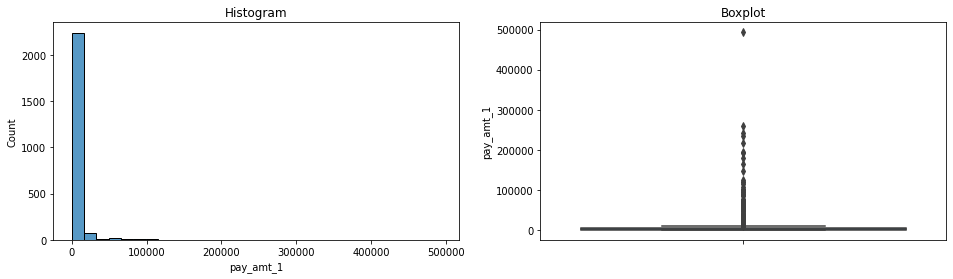

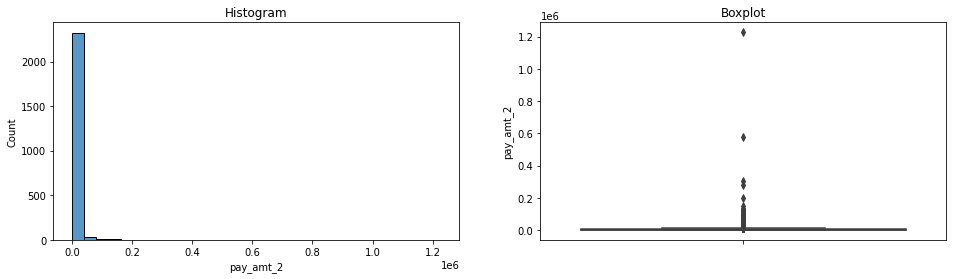

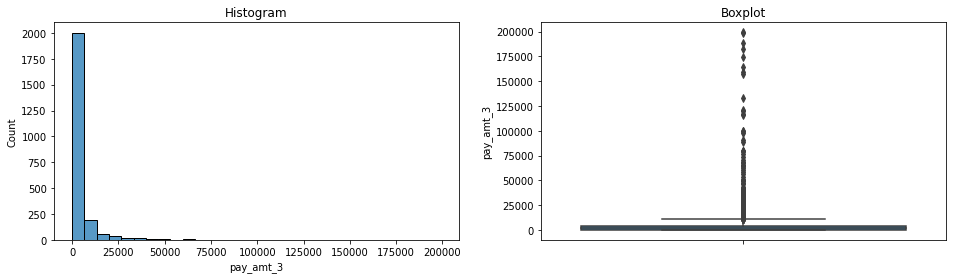

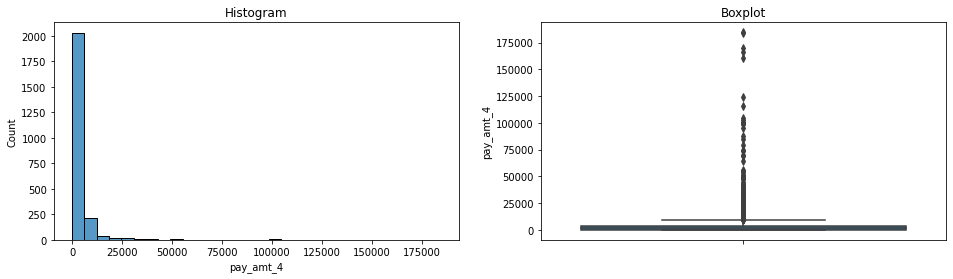

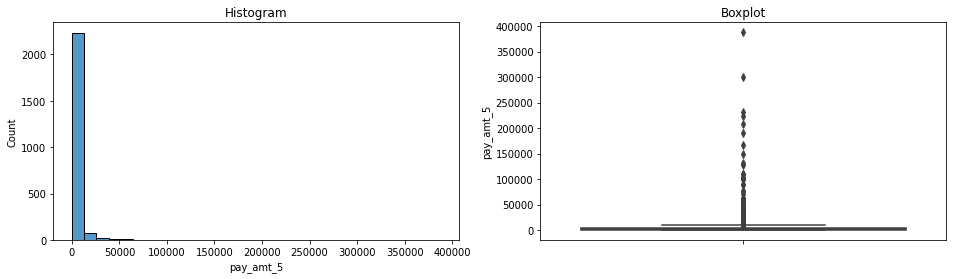

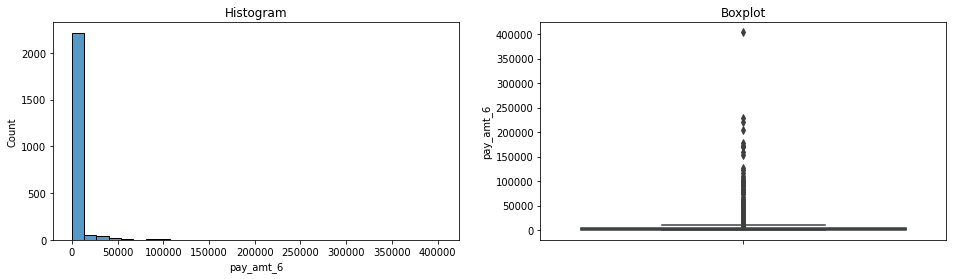

In [29]:
# Tampilkan Plot Setiap fitur numerik dengan loop
for columns in num_columns:
  diagnostic_plots(X_train,columns)

In [30]:
# Create Function for checking skew
def skewness(df, variable):
  skew = df[variable].skew()
  return print('\nSkewness Value : ',columns,skew)

In [31]:
# Showin skew value
for columns in num_columns:
  skewness(df,columns)


Skewness Value :  limit_balance 1.0004416437793329

Skewness Value :  age 0.7728871800647299

Skewness Value :  pay_0 0.9267902583584399

Skewness Value :  bill_amt_1 2.4845979515192678

Skewness Value :  pay_amt_1 11.877646508452141

Skewness Value :  pay_amt_2 29.404260716921023

Skewness Value :  pay_amt_3 8.044638784580487

Skewness Value :  pay_amt_4 8.45154112454925

Skewness Value :  pay_amt_5 11.468889852065466

Skewness Value :  pay_amt_6 9.760184438993202


---

**RESULT**

From the visualization above, it can be seen that if a lot of data from features are detected as outliers, and have a skew value far from 0, it can be concluded that there is a lot of abnormal data, because of this, it was decided to handle outliers using `Winsorizer` because it will not delete data where almost all of the data is detected as outliers, and will also clean up data that is really extreme.

---

In [32]:
!pip install feature-engine # Install Winsorizer
from feature_engine.outliers import Winsorizer # Import Outlier Handling Method

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 260 kB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 47.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [33]:
num_columns

['limit_balance',
 'age',
 'pay_0',
 'bill_amt_1',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6']

In [34]:
# Create the capper

windsoriser = Winsorizer(capping_method='quantiles', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both',  # cap left, right or both tails 
                          fold=0.05,   
                          variables=['limit_balance','pay_0','bill_amt_1','pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6'])

windsoriser.fit(X_train)

X_train = windsoriser.transform(X_train)
X_test = windsoriser.transform(X_test)

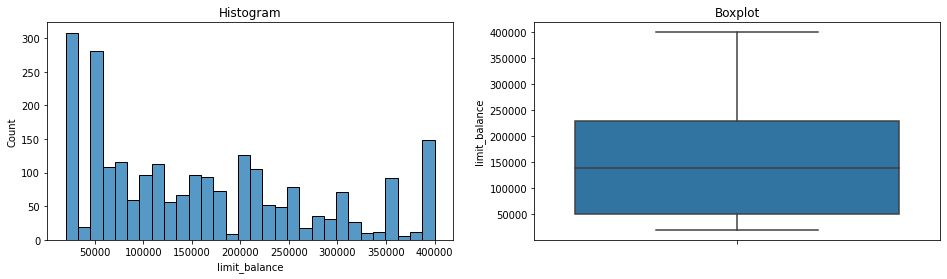

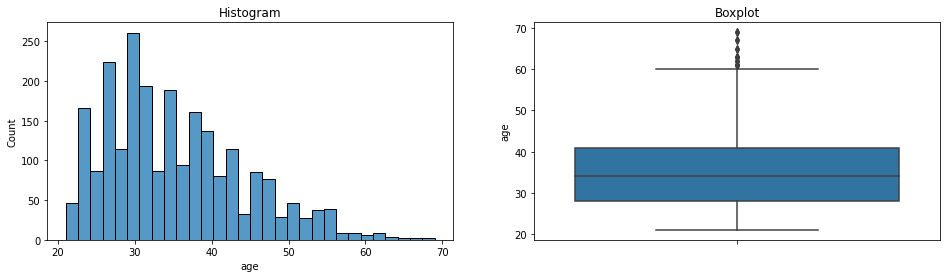

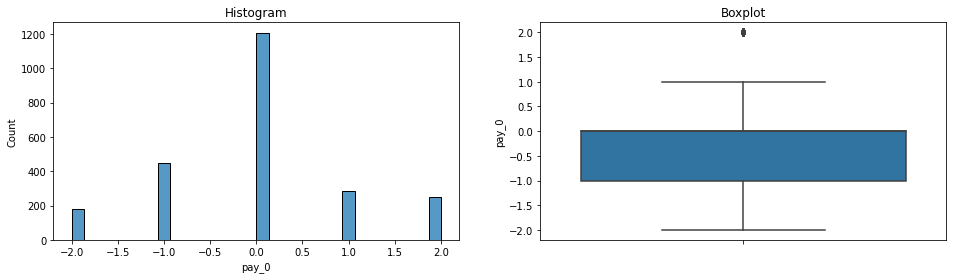

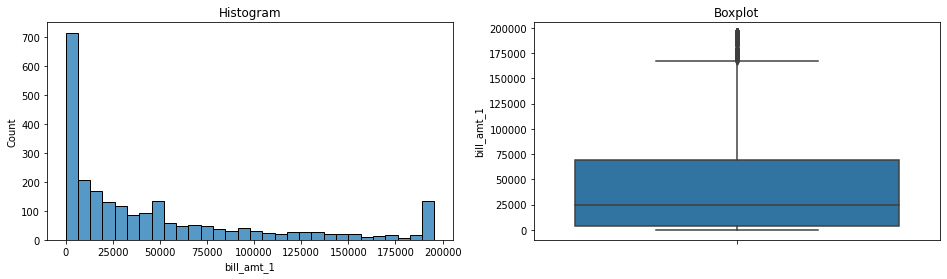

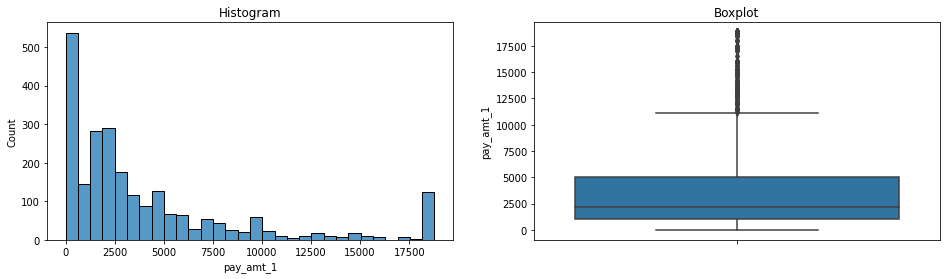

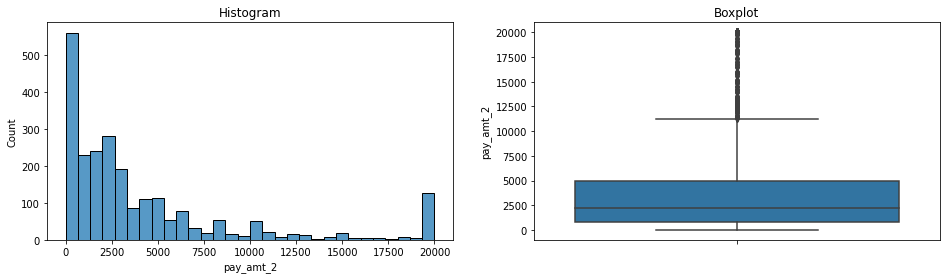

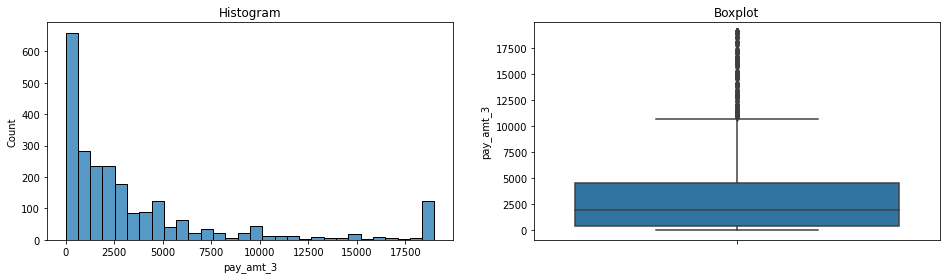

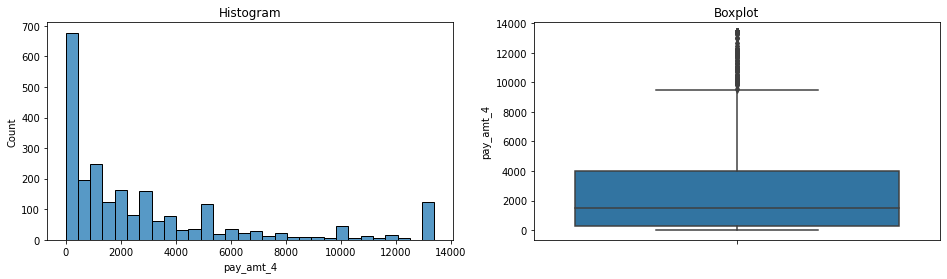

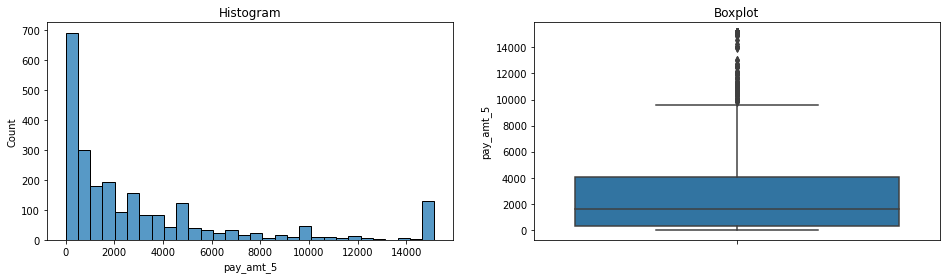

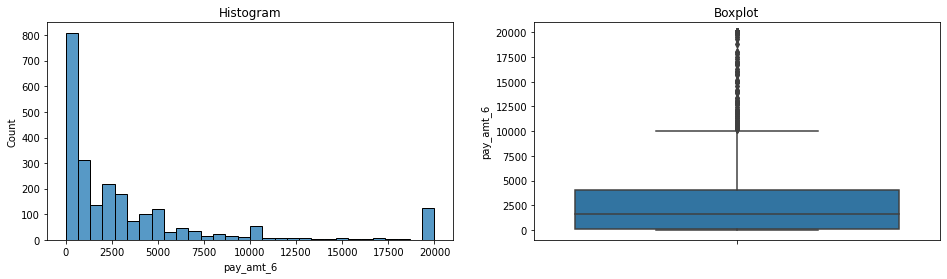

In [35]:
# Showin plots
for columns in num_columns:
  diagnostic_plots(X_train,columns)

### Missing Value

In [36]:
X_train.isna().sum().sum() # Train Check Miss-Val

0

In [37]:
X_test.isna().sum().sum() # Test Check Miss-val

0

In [38]:
y_train.isna().sum().sum() # Target Check Miss-val

0

In [39]:
y_test.isna().sum().sum() # Target Check miss-val

0

## Feature Engineering

In [40]:
# Split Train-Set and Test-Set based on Column Type (Numerical/Categorical)

# Define Numeric for X_train
X_train_num = X_train[num_columns]
# Define Cathegoric for X_train
X_train_cat = X_train[cat_columns]
# Define Numeric for X_test
X_test_num = X_test[num_columns]
# Define Cathegoric for X_test
X_test_cat = X_test[cat_columns]

In [41]:
# Feature Scaling using StandardScaler

# Import Methode
from sklearn.preprocessing import StandardScaler

# Define Scaler
scaler = StandardScaler()
# Fitting Scaler for X_train
scaler.fit(X_train_num)

# Define X_train that has been scaled
X_train_num_scaled = scaler.transform(X_train_num)
# Define X_test that has been scaled
X_test_num_scaled = scaler.transform(X_test_num)
# Showin Result
X_train_num_scaled

array([[-0.96538027, -1.24279699,  0.01368755, ...,  0.02010364,
        -0.27761005, -0.38479907],
       [-0.52729303, -1.35475303, -0.97015673, ..., -0.80847994,
        -0.78097769,  1.12976222],
       [ 0.34888145,  0.77241171,  0.99753183, ..., -0.80847994,
        -0.78097769, -0.68618431],
       ...,
       [-0.96538027, -0.34714868,  0.01368755, ..., -0.80847994,
         0.22575759, -0.68618431],
       [ 0.78696868,  1.3321919 , -1.95400101, ..., -0.35469233,
        -0.35638708, -0.68618431],
       [-0.96538027,  0.32458755, -0.97015673, ..., -0.70076407,
        -0.682821  , -0.60782414]])

## Feature Encoding

In [42]:
# separate ordinal and nominal features

# Define X_train Ordinal Cathegorical
X_train_cat_ordinal = X_train_cat[['education_level']]
# Define X_train Nominal Cathegorical
X_train_cat_nominal = X_train_cat[['marital_status','sex']]
# Define X_test Ordinal Cathegorical
X_test_cat_ordinal = X_test_cat[['education_level']]
# Define X_test Nominal Cathegorical
X_test_cat_nominal = X_test_cat[['marital_status','sex']]

In [43]:
cat_col

['sex', 'education_level', 'marital_status', 'default_payment_next_month']

In [44]:
df['education_level'].unique()

array([1, 2, 3, 5, 4, 6, 0], dtype=object)

In [45]:
df['marital_status'].unique()

array([2, 1, 3, 0], dtype=object)

In [46]:
df['sex'].unique()

array([1, 2], dtype=object)

In [47]:
# Using OrdinalEncoder,because the category contains levels

from sklearn.preprocessing import OrdinalEncoder 

# define Ordinal encoding
encoder = OrdinalEncoder()
# transform X_train
X_train_cat_ordinal_enc = encoder.fit_transform(X_train_cat_ordinal)
X_test_cat_ordinal_enc = encoder.transform(X_test_cat_ordinal)

In [48]:
!pip install category_encoders # Installing transformer encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 3.7 MB/s 


In [49]:
# Using OneHotEncoder,because the category not contains levels

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

# define OneHotEncoder
ce_OHE = ce.OneHotEncoder(cols=['marital_status','sex'])

# transform X_train
X_train_cat_nominal_enc = ce_OHE.fit_transform(X_train_cat_nominal)
X_test_cat_nominal_enc = ce_OHE.transform(X_test_cat_nominal)

In [50]:
# Concate Columns

# Concate Num Scalled columns with Ordinal Encoding Columns
X_train_final_1 = np.concatenate([X_train_num_scaled, X_train_cat_ordinal_enc], axis=1)
X_test_final_1 = np.concatenate([X_test_num_scaled, X_test_cat_ordinal_enc], axis=1)
X_train_final_1

array([[-0.96538027, -1.24279699,  0.01368755, ..., -0.27761005,
        -0.38479907,  1.        ],
       [-0.52729303, -1.35475303, -0.97015673, ..., -0.78097769,
         1.12976222,  1.        ],
       [ 0.34888145,  0.77241171,  0.99753183, ..., -0.78097769,
        -0.68618431,  1.        ],
       ...,
       [-0.96538027, -0.34714868,  0.01368755, ...,  0.22575759,
        -0.68618431,  2.        ],
       [ 0.78696868,  1.3321919 , -1.95400101, ..., -0.35638708,
        -0.68618431,  3.        ],
       [-0.96538027,  0.32458755, -0.97015673, ..., -0.682821  ,
        -0.60782414,  2.        ]])

In [51]:
# Concate Columns

# Concate Num Scalled columns with Nominal Encoding Columns
X_train_final = np.concatenate([X_train_final_1,X_train_cat_nominal_enc],axis=1)
X_test_final = np.concatenate([X_train_final_1,X_train_cat_nominal_enc],axis=1)
X_train_final

array([[-0.96538027, -1.24279699,  0.01368755, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52729303, -1.35475303, -0.97015673, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.34888145,  0.77241171,  0.99753183, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.96538027, -0.34714868,  0.01368755, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.78696868,  1.3321919 , -1.95400101, ...,  0.        ,
         1.        ,  0.        ],
       [-0.96538027,  0.32458755, -0.97015673, ...,  0.        ,
         1.        ,  0.        ]])

In [52]:
# Display Concate's Result as a DataFrame

X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.965380,-1.242797,0.013688,-0.205287,0.182220,0.170837,0.425821,0.020104,-0.277610,-0.384799,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.527293,-1.354753,-0.970157,-0.821735,-0.848153,0.843527,-0.744480,-0.808480,-0.780978,1.129762,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.348881,0.772412,0.997532,-0.836697,-0.848153,-0.797900,-0.744480,-0.808480,-0.780978,-0.686184,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.614910,0.436544,-0.970157,-0.790614,0.726051,1.398420,-0.437163,2.858831,1.741398,2.135786,2.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.225056,-0.794973,0.013688,2.607437,0.185723,-0.177908,-0.027885,0.020104,-0.025926,3.332286,2.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,-1.140615,-1.354753,0.013688,-0.511108,-0.198400,-0.449155,-0.744480,0.020104,-0.780978,0.168745,2.0,1.0,0.0,0.0,0.0,1.0,0.0
2368,-0.965380,0.548500,0.013688,0.044577,-0.549345,-0.507279,-0.662583,-0.532285,-0.529294,-0.284337,2.0,0.0,1.0,0.0,0.0,0.0,1.0
2369,-0.965380,-0.347149,0.013688,-0.112998,-0.023854,-0.797900,-0.048359,-0.808480,0.225758,-0.686184,2.0,1.0,0.0,0.0,0.0,1.0,0.0
2370,0.786969,1.332192,-1.954001,-0.707092,3.022803,-0.797900,-0.349329,-0.354692,-0.356387,-0.686184,3.0,1.0,0.0,0.0,0.0,1.0,0.0


# Modelling

1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest
5. KNN
6. Naive Bayes
7. ADABoost Classifier

## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

# Model Definition
lr = LogisticRegression()
# Model Training
lr.fit(X_train_final,y_train)
# Prediction
y_pred_train = lr.predict(X_train_final)

### Model Evaluation

Accuracy - Train Set  :  0.8275716694772344 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1857
           1       0.74      0.32      0.45       515

    accuracy                           0.83      2372
   macro avg       0.79      0.64      0.67      2372
weighted avg       0.82      0.83      0.80      2372
 

Confusion Matrix      : 


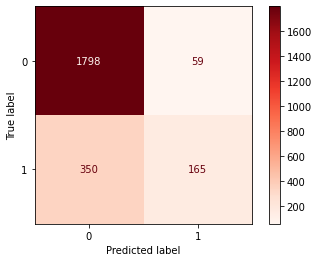

In [54]:
# Check Performance Model

# Accuracy of the model's value to the trained data
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_pred_train), '\n')
# Classification performance results
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
# Plotting of classification performance results
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr, X_train_final, y_train, cmap='Reds'));

---

Due to imbalanced data, the objective model assessment is only to predict participants who are `YES`

from the plotting above can be described if:

1. `Logistic regression` model can predict `Yes` with `Precision` `74%`, but `F1 - Score` to assess how good the model predicts is only `45%`.

2. `Logistic regression` model can predict `No` with `Precision` `84%`, and `F1 - Score` in predicting correctly is quite high with a value of ` 90%`.

---

### Cross Validation

In [55]:
# Cross Validation using `cross_val_score` to validate the metric results

%%time
from sklearn.model_selection import cross_val_score


# Use 10 fold CV to better assess model performance
acc_train_cross_val = cross_val_score(lr, 
                                      X_train_final, 
                                      y_train, 
                                      cv=10, scoring="accuracy")

# Validate accuracy value
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
# Validate the average accuracy value
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
# Validate the standard deviation value 
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
# Validate range of values ​​with test-set
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.83193277 0.81932773 0.80590717 0.82278481 0.84388186 0.84388186
 0.82700422 0.81012658 0.83966245 0.82278481]
Accuracy - Mean - Cross Validation :  0.8267294259475942
Accuracy - Std - Cross Validation  :  0.012561651302122
Accuracy - Range of Test-Set       :  0.8141677746454723 - 0.8392910772497162
CPU times: user 424 ms, sys: 328 ms, total: 752 ms
Wall time: 399 ms


---

the results of the `cross_validation` validation above can be described:

* The accuracy of the model in predicting looks stable at `> 80 %` with an average of `82 %` and a standard deviation that makes the range not too far away, from these results it can be concluded that the `Logistic Regression` model is stable in predicting.

---

## Support Vector Machine

In [56]:
from sklearn import svm

# Model Definition
sv = svm.SVC()
# Model Training
sv.fit(X_train_final,y_train)
# Prediction
y_pred_train = sv.predict(X_train_final)

### Model Evaluation

Accuracy - Train Set  :  0.8397976391231029 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.91      1857
           1       0.79      0.35      0.49       515

    accuracy                           0.84      2372
   macro avg       0.82      0.66      0.70      2372
weighted avg       0.83      0.84      0.81      2372
 

Confusion Matrix      : 


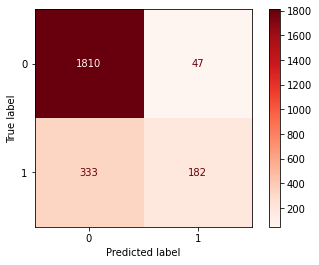

In [57]:
# Check Performance Model

# Accuracy of the model's value to the trained data
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_pred_train), '\n')
# Classification performance results
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
# Plotting of classification performance results
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(sv, X_train_final, y_train, cmap='Reds'));

---

Due to imbalanced data, the objective model assessment is only to predict participants who are `YES`

from the plotting above can be described if:

1. `Support Vector Machine` model can predict `Yes` with `Precision` 79%, but `F1 - Score` to assess how good the model predicts is only 49%.

2. `Support Vector Machine` model can predict `No` with `Precision` 84%, and `F1 - Score` in predicting correctly is quite high with a value of 91%.

3. At a glance from the results, it can be concluded that the `SVM` model is better than `Logistic Regression`

---

### Cross Validation

In [58]:
# Cross Validation using `cross_val_score` to validate the metric results

%%time
from sklearn.model_selection import cross_val_score


# Use 10 fold CV to better assess model performance
acc_train_cross_val = cross_val_score(sv, 
                                      X_train_final, 
                                      y_train, 
                                      cv=10, scoring="accuracy")

# Validate accuracy value
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
# Validate the average accuracy value
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
# Validate the standard deviation value 
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
# Validate range of values ​​with test-set
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.84453782 0.83193277 0.80590717 0.82700422 0.83544304 0.84388186
 0.83544304 0.82700422 0.84388186 0.80590717]
Accuracy - Mean - Cross Validation :  0.8300943162074956
Accuracy - Std - Cross Validation  :  0.013559269746758697
Accuracy - Range of Test-Set       :  0.8165350464607369 - 0.8436535859542543
CPU times: user 1.95 s, sys: 10.6 ms, total: 1.96 s
Wall time: 1.97 s


---

the results of the `cross_validation` validation above can be described:

* The accuracy of the model in predicting looks stable at `> 80 %` with an average of `83 %` and a standard deviation that makes the range not too far away, from these results it can be concluded that the `SVM` model is stable in predicting, and better than the `logistic regression` model

---

## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

# Model Definition
dt = DecisionTreeClassifier()
# Model Training
dt.fit(X_train_final,y_train)
# Prediction
y_pred_train = dt.predict(X_train_final)

### Model Evaluation

Accuracy - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1857
           1       1.00      1.00      1.00       515

    accuracy                           1.00      2372
   macro avg       1.00      1.00      1.00      2372
weighted avg       1.00      1.00      1.00      2372
 

Confusion Matrix      : 


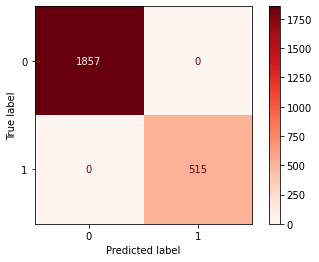

In [60]:
# Check Performance Model

# Accuracy of the model's value to the trained data
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_pred_train), '\n')
# Classification performance results
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
# Plotting of classification performance results
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt, X_train_final, y_train, cmap='Reds'));

---

Due to imbalanced data, the objective model assessment is only to predict participants who are `YES`

from the plotting above can be described if:

1. `Decision Tree` model can predict `Yes` with `Precision` `75%`, but `F1 - Score` to assess how good the model predicts is only `50%`.

2. `Decision Tree` model can predict `No` with `Precision` `85%`, and `F1 - Score` in predicting correctly is quite high with a value of ` 90%`.

3. the plotting model is able to predict `True Positive` and `True Negative` well

4. From these results, it can be concluded that the `decision tree` is better than the `SVM` and `Logistic Regression` models in predicting this data because the `F1-Score` and `Precision` values ​​are higher than the previous 2 models.

---

### Cross Validation

In [61]:
# Cross Validation using `cross_val_score` to validate the metric results

%%time
from sklearn.model_selection import cross_val_score


# Use 10 fold CV to better assess model performance
acc_train_cross_val = cross_val_score(dt, 
                                      X_train_final, 
                                      y_train, 
                                      cv=10, scoring="accuracy")

# Validate accuracy value
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
# Validate the average accuracy value
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
# Validate the standard deviation value 
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
# Validate range of values ​​with test-set
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.72689076 0.67647059 0.71729958 0.75949367 0.75949367 0.72995781
 0.78059072 0.74683544 0.75105485 0.76371308]
Accuracy - Mean - Cross Validation :  0.7411800163103216
Accuracy - Std - Cross Validation  :  0.028193837652276222
Accuracy - Range of Test-Set       :  0.7129861786580454 - 0.7693738539625978
CPU times: user 224 ms, sys: 2.9 ms, total: 227 ms
Wall time: 230 ms


---



the results of the `cross_validation` validation above can be described:

* The accuracy of the model in predicting looks stable at `> 68 %` with an average of `73 %` and a standard deviation that makes the range not too far away, and from these results it can be concluded that in fact the `Decision Tree` model is not better than the previous 2 models, because its value is lower than the previous model.

---

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Model Definition
rf = RandomForestClassifier()
# Model Training
rf.fit(X_train_final,y_train)
# Prediction
y_pred_train = rf.predict(X_train_final)

### Model Evaluation

________________________________________________________________________________________________________________
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1857
           1       1.00      1.00      1.00       515

    accuracy                           1.00      2372
   macro avg       1.00      1.00      1.00      2372
weighted avg       1.00      1.00      1.00      2372

________________________________________________________________________________________________________________
Accuration Prediction :
1.0
________________________________________________________________________________________________________________
Confusion Matrix      : 


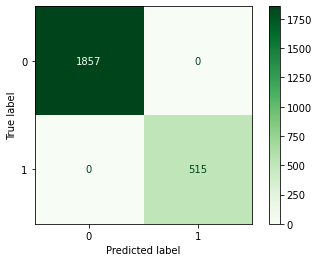

In [63]:
# Report
print('________________________________________________________________________________________________________________')
print('Classification Report :')
print(classification_report(y_train, y_pred_train))
print('________________________________________________________________________________________________________________')
# Akurasi Model
print('Accuration Prediction :')
print(accuracy_score(y_train, y_pred_train))
# Confusion Matrix
print('________________________________________________________________________________________________________________')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train, cmap='Greens'))

---


From the results above, it can be seen that `Random Forest` can predict the model perfectly.

---

### Cross Validation

In [64]:
# Cross Validation using `cross_val_score` to validate the metric results

%%time
from sklearn.model_selection import cross_val_score


# Use 10 fold CV to better assess model performance
acc_train_cross_val = cross_val_score(rf, 
                                      X_train_final, 
                                      y_train, 
                                      cv=10, scoring="accuracy")

# Validate accuracy value
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
# Validate the average accuracy value
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
# Validate the standard deviation value 
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
# Validate range of values ​​with test-set
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.83613445 0.82773109 0.80590717 0.81012658 0.8185654  0.83544304
 0.8185654  0.81012658 0.85232068 0.82278481]
Accuracy - Mean - Cross Validation :  0.8237705208665747
Accuracy - Std - Cross Validation  :  0.01366193038740347
Accuracy - Range of Test-Set       :  0.8101085904791712 - 0.8374324512539781
CPU times: user 7.19 s, sys: 49.1 ms, total: 7.24 s
Wall time: 8.8 s


---

the results of the `cross_validation` validation above can be described:

* The accuracy of the model in predicting looks stable at `> 80 %` with an average of `82 %` and a standard deviation that makes the range not too far away,From these results it can be concluded that the `Random Forest` model is not very stable in predicting, and cannot be said to be better than the `SVM` and `Logistic Regression` models because the `F1-Score` and `Precision` values ​​are not significantly different.

---

## K-NN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

# Model Definition
knn=KNeighborsClassifier()
# Model Training
knn.fit(X_train_final,y_train)
# Prediction
y_pred_train = knn.predict(X_train_final)

### Model Evaluation

________________________________________________________________________________________________________________
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1857
           1       0.76      0.43      0.55       515

    accuracy                           0.85      2372
   macro avg       0.81      0.70      0.73      2372
weighted avg       0.84      0.85      0.83      2372

________________________________________________________________________________________________________________
Accuration Prediction :
0.8473861720067454
________________________________________________________________________________________________________________
Confusion Matrix      : 


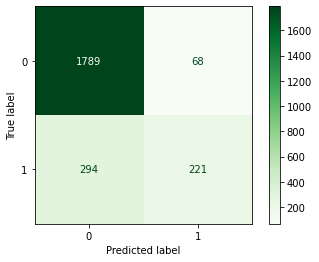

In [66]:
# Report
print('________________________________________________________________________________________________________________')
print('Classification Report :')
print(classification_report(y_train, y_pred_train))
print('________________________________________________________________________________________________________________')
# Akurasi Model
print('Accuration Prediction :')
print(accuracy_score(y_train, y_pred_train))
# Confusion Matrix
print('________________________________________________________________________________________________________________')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_train_final, y_train, cmap='Greens'))

---

Due to imbalanced data, the objective model assessment is only to predict participants who are `YES`

from the plotting above can be described if:

1. `K-NN` model can predict `Yes` with `Precision` 76%, but `F1 - Score` to assess how good the model predicts is only 55%. It is better than `Logistic regression` and `SVM` . models

2. `K-NN` model can predict `No` with `Precision` 86%, and `F1 - Score` in predicting correctly is quite high with a value of 91%, It is better than `Logistic regression` and `SVM` . models

3. At a glance from the results, it can be concluded that the `KNN` model is better than `Logistic Regression` and `SVM` because the `F1-Score` value is higher, but not with precision, `SVM` is still superior in precision than this model.

---

### Cross Validation

In [67]:
# Cross Validation using `cross_val_score` to validate the metric results

%%time
from sklearn.model_selection import cross_val_score


# Use 10 fold CV to better assess model performance
acc_train_cross_val = cross_val_score(knn, 
                                      X_train_final, 
                                      y_train, 
                                      cv=10, scoring="accuracy")

# Validate accuracy value
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
# Validate the average accuracy value
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
# Validate the standard deviation value 
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
# Validate range of values ​​with test-set
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.81932773 0.80672269 0.76793249 0.79324895 0.80168776 0.82700422
 0.80590717 0.80168776 0.82700422 0.76371308]
Accuracy - Mean - Cross Validation :  0.8014236074176505
Accuracy - Std - Cross Validation  :  0.020707919256514933
Accuracy - Range of Test-Set       :  0.7807156881611356 - 0.8221315266741654
CPU times: user 323 ms, sys: 227 ms, total: 550 ms
Wall time: 486 ms


---

the results of the `cross_validation` validation above can be described:

* The accuracy of the model in predicting looks not stable at `> 76 %` with an average of `80 %` and a standard deviation that makes the range not too far away, from these results it can be concluded that the `KNN` model is stable in predicting, but it can't be said to be better than `SVM` because the range is very different and is not higher than `SVM`.

---

## Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

# Model Definition
gnb = GaussianNB()
# Model Training
gnb.fit(X_train_final,y_train)
# Prediction
y_pred_train = gnb.predict(X_train_final)

### Model Evaluation

________________________________________________________________________________________________________________
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.17      0.29      1857
           1       0.24      0.95      0.38       515

    accuracy                           0.34      2372
   macro avg       0.58      0.56      0.34      2372
weighted avg       0.77      0.34      0.31      2372

________________________________________________________________________________________________________________
Accuration Prediction :
0.33895446880269814
________________________________________________________________________________________________________________
Confusion Matrix      : 


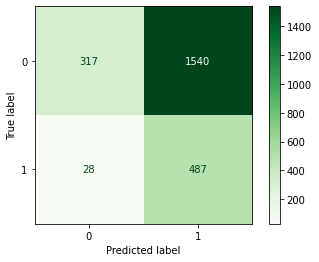

In [69]:
# Report
print('________________________________________________________________________________________________________________')
print('Classification Report :')
print(classification_report(y_train, y_pred_train))
print('________________________________________________________________________________________________________________')
# Akurasi Model
print('Accuration Prediction :')
print(accuracy_score(y_train, y_pred_train))
# Confusion Matrix
print('________________________________________________________________________________________________________________')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gnb, X_train_final, y_train, cmap='Greens'))

---

The `Gaussian Naive Bayes` model has the worst score than the previous model.

---

### Cross Validation

In [70]:
# Cross Validation using `cross_val_score` to validate the metric results

%%time
from sklearn.model_selection import cross_val_score


# Use 10 fold CV to better assess model performance
acc_train_cross_val = cross_val_score(gnb, 
                                      X_train_final, 
                                      y_train, 
                                      cv=10, scoring="accuracy")

# Validate accuracy value
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
# Validate the average accuracy value
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
# Validate the standard deviation value 
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
# Validate range of values ​​with test-set
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.34033613 0.36134454 0.3628692  0.29535865 0.33333333 0.32489451
 0.3628692  0.32911392 0.35443038 0.32911392]
Accuracy - Mean - Cross Validation :  0.33936637946317766
Accuracy - Std - Cross Validation  :  0.020514403305829154
Accuracy - Range of Test-Set       :  0.3188519761573485 - 0.3598807827690068
CPU times: user 61.1 ms, sys: 3.07 ms, total: 64.2 ms
Wall time: 81.8 ms


---

in cross validation, the same results are obtained if the `Gaussian Naive Bayes` model has the worst score than the previous model.

---

## ADA Boost

In [71]:
from sklearn.ensemble import AdaBoostClassifier

# Model Definition
ab = AdaBoostClassifier()
# Model Training
ab.fit(X_train_final,y_train)
# Prediction
y_pred_train = ab.predict(X_train_final)

### Model Evaluation

________________________________________________________________________________________________________________
Classification Report :
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1857
           1       0.75      0.37      0.50       515

    accuracy                           0.84      2372
   macro avg       0.80      0.67      0.70      2372
weighted avg       0.83      0.84      0.81      2372

________________________________________________________________________________________________________________
Accuration Prediction :
0.8368465430016864
________________________________________________________________________________________________________________
Confusion Matrix      : 


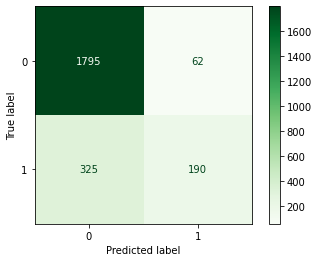

In [72]:
# Report
print('________________________________________________________________________________________________________________')
print('Classification Report :')
print(classification_report(y_train, y_pred_train))
print('________________________________________________________________________________________________________________')
# Akurasi Model
print('Accuration Prediction :')
print(accuracy_score(y_train, y_pred_train))
# Confusion Matrix
print('________________________________________________________________________________________________________________')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ab, X_train_final, y_train, cmap='Greens'))

---

Due to imbalanced data, the objective model assessment is only to predict participants who are `YES`

from the plotting above can be described if:

1. `Ada Boost` model can predict `Yes` with `Precision` `75%`, but `F1 - Score` to assess how good the model predicts is only `50%`.

2. `Ada Boost` model can predict `No` with `Precision` `85%`, and `F1 - Score` in predicting correctly is quite high with a value of ` 90%`.

3. The result of this model looks almost the same as the `SVM` model

---

### Cross Validation

In [73]:
# Cross Validation using `cross_val_score` to validate the metric results

%%time
from sklearn.model_selection import cross_val_score


# Use 10 fold CV to better assess model performance
acc_train_cross_val = cross_val_score(ab, 
                                      X_train_final, 
                                      y_train, 
                                      cv=10, scoring="accuracy")

# Validate accuracy value
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
# Validate the average accuracy value
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
# Validate the standard deviation value 
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
# Validate range of values ​​with test-set
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.84033613 0.83613445 0.81434599 0.8185654  0.83966245 0.83966245
 0.83544304 0.8185654  0.8649789  0.82700422]
Accuracy - Mean - Cross Validation :  0.833469843633656
Accuracy - Std - Cross Validation  :  0.014069356544384572
Accuracy - Range of Test-Set       :  0.8194004870892714 - 0.8475392001780405
CPU times: user 3.36 s, sys: 14.1 ms, total: 3.37 s
Wall time: 4.64 s


---

the results of the `cross_validation` validation above can be described:

* The accuracy of the model in predicting looks stable at `> 80 %` with an average of `83 %` and a standard deviation that makes the range not too far away, from these results it can be concluded that the `Ada Boost` model is stable in predicting, and not too much different from the `SVM` model

---

----

# Model Conclusion

* The best model is `Support Vector Machine` because the values ​​of `F1-Score` and `Precision` are good, and the results of `cross_validation` are stable compared to the other models.

----

# Model Optimization

In [74]:
# Import GridSearchCV for searching a best parameter for model
from sklearn.model_selection import GridSearchCV
 
# define parameter
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
# fitting model
grid_result = grid.fit(X_train_final, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.783 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.783 total time=   0.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.783 total time=   0.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.783 total time=   0.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.783 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.819 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.813 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.816 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.783 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [75]:

# best parameter
print(grid.best_params_)
 
# model after hyperparameter tuning
print(grid.best_estimator_)

# model best score
print(grid_result.best_score_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)
0.8355825005551853


In [76]:
# Define Grid
sv_gridcv_best = grid.best_estimator_

Accuracy - train Set   :  0.8368465430016864 

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      1857
           1       0.76      0.36      0.49       515

    accuracy                           0.84      2372
   macro avg       0.80      0.66      0.70      2372
weighted avg       0.83      0.84      0.81      2372
 

------------------------------------------------------------------------------------------------------------
-----------------------------------------------------

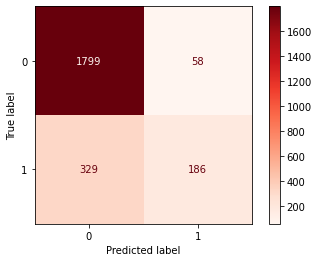

In [77]:
# Check Performance Model against train-Set

y_pred_train = sv_gridcv_best.predict(X_train_final)

print('Accuracy - train Set   : ', accuracy_score(y_train, y_pred_train), '\n')
print('------------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------------')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('------------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------------')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(sv_gridcv_best, X_train_final, y_train, cmap='Reds'))

---



---

# Model Inference

In [78]:
# Define Data Inference
data_inf = df_inf.sample(10, random_state=22)

In [79]:
# Remove Inf-Set from Dataset

data_train_test = df.drop(data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,bill_amt_1,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,47174,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,48088,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,78630,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,58180,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,42058,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,44100,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,280,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,0,2920,0,0,0,6753,0,1


In [80]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,bill_amt_1,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,410000,2,1,2,31,0,134072,15003,15877,30000,14250,9971,27380,0
1,50000,1,2,2,27,2,48655,460,5021,0,10000,2005,37,1
2,20000,1,1,2,24,2,1891,4000,0,1000,0,1237,1000,1
3,230000,1,2,1,41,0,301038,9405,7769,7757,8030,6549,5226,1
4,100000,1,1,2,30,0,100544,4511,3711,3685,2797,2897,3046,1
5,100000,1,5,1,38,0,101330,3824,4311,3648,3370,3492,3614,0
6,200000,1,1,2,30,-1,6589,3449,2798,54271,7000,4000,6000,0
7,50000,2,2,1,32,0,36062,1500,1847,1000,0,0,0,0
8,310000,1,1,1,45,-2,8964,1174,6527,0,0,0,0,0
9,20000,1,1,2,24,-1,390,390,390,780,0,0,0,0


In [81]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [82]:
# Feature Scaling

data_inf_num_scaled = scaler.transform(data_inf_num)

In [83]:
# separate ordinal and nominal features

data_inf_cat_ordinal = data_inf_cat[['education_level']]
data_inf_cat_nominal = data_inf_cat[['marital_status','sex']]

In [84]:
# transform nominal cat in data_inf
data_inf_cat_nominal_enc = ce_OHE.transform(data_inf_cat_nominal)

In [85]:
# transform ordinal cat in data_inf
data_inf_cat_ordinal_enc = encoder.transform(data_inf_cat_ordinal)

In [86]:
# Concate scalled columns with ordinal columns

data_inf_final_1 = np.concatenate([data_inf_num_scaled, data_inf_cat_ordinal_enc], axis=1)

In [87]:
# Concate Columns to final data
data_inf_final = np.concatenate([data_inf_final_1,data_inf_cat_nominal_enc],axis=1)

# Display as a DataFrame
data_inf_final_df = pd.DataFrame(data_inf_final)
data_inf_final_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2.188848,-0.459105,0.013688,1.523271,2.243584,2.278226,5.397758,3.127292,1.728562,4.815101,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.965380,-0.906929,1.981376,0.019740,-0.753358,0.174906,-0.744480,1.953465,-0.276352,-0.678750,2.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.228233,-1.242797,1.981376,-0.803411,-0.023854,-0.797900,-0.539738,-0.808480,-0.469645,-0.485261,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.611734,0.660456,0.013688,4.462247,1.089978,0.707323,0.843698,1.409362,0.867300,0.363842,2.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.527293,-0.571061,0.013688,0.933103,0.081450,-0.078903,0.009992,-0.035964,-0.051850,-0.074171,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5,-0.527293,0.324588,0.013688,0.946938,-0.060124,0.037345,0.002416,0.122296,0.097902,0.039953,5.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.348881,-0.571061,-0.970157,-0.720716,-0.137402,-0.255795,10.367033,1.124882,0.225758,0.519357,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,-0.965380,-0.347149,0.013688,-0.201925,-0.539041,-0.440048,-0.539738,-0.808480,-0.780978,-0.686184,2.0,0.0,1.0,0.0,0.0,1.0,0.0
8,1.312673,1.108280,-1.954001,-0.678910,-0.606221,0.466689,-0.744480,-0.808480,-0.780978,-0.686184,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9,-1.228233,-1.242797,-0.970157,-0.829832,-0.767784,-0.722338,-0.584782,-0.808480,-0.780978,-0.686184,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [88]:
# Get predict

y_pred_inf = sv_gridcv_best.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Yes - Prediction'])
y_pred_inf_df

,Yes - Prediction
0,0
1,1
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [89]:
# Concat and showin data with model prediction

pd.concat([data_inf, y_pred_inf_df], axis=1)

,limit_balance,sex,education_level,marital_status,age,pay_0,bill_amt_1,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Yes - Prediction
0,410000,2,1,2,31,0,134072,15003,15877,30000,14250,9971,27380,0,0
1,50000,1,2,2,27,2,48655,460,5021,0,10000,2005,37,1,1
2,20000,1,1,2,24,2,1891,4000,0,1000,0,1237,1000,1,1
3,230000,1,2,1,41,0,301038,9405,7769,7757,8030,6549,5226,1,0
4,100000,1,1,2,30,0,100544,4511,3711,3685,2797,2897,3046,1,0
5,100000,1,5,1,38,0,101330,3824,4311,3648,3370,3492,3614,0,0
6,200000,1,1,2,30,-1,6589,3449,2798,54271,7000,4000,6000,0,0
7,50000,2,2,1,32,0,36062,1500,1847,1000,0,0,0,0,0
8,310000,1,1,1,45,-2,8964,1174,6527,0,0,0,0,0,0
9,20000,1,1,2,24,-1,390,390,390,780,0,0,0,0,0


----



# Conclusion



---

* **EDA :** 
     1. Based on gender with the target, information is obtained if male participants are only slightly compared to female participants who will pay next month.

     2. Based on the `age` feature, we can see if there are more candidates in the age of `20` to `50` years.

     3. Based on the `limit_balance` feature, we get if many candidates have balance limits below `100,000` 
     4. because most of the participants had a university education level, the participants who will not pay, and will pay next month are mostly participants who have university education, followed by participants who have regular school education, and high school graduates.
     5. Based on `martial_status` against the target, information is obtained that participants who pay next month have a not too significant comparison between participants who are married and those who are still single, and it is clearly different from participants who do not pay next month.
     6. from the `pay` feature group, all of which are interdependent and highly correlated, it can be concluded that if some features can be removed, this condition is also experienced by the `bill_amt` feature group, and for the `pay_amt` feature group the features havent very correlation high or tend to be 'independent', it can be concluded if these features can be used for prediction of the target.

---

* **Modelling :**
     *  The best model in this project is `Support Vector Machine`, its because the values ​​of `F1-Score` and `Precision` its good, and the results of `cross_validation` are stable compared to the other models.

---


# **Answer the following questions:** 


    1. What is the criterion parameter function in the Decision Tree? Explain one `criterion` that you understand!

        1. parameters to separate features
        2. `Maximal_Depth` : `Maximal_Depth` one type of this `criterion(Decision Tree Parameter)` serves to limit the depth of the model


    2. What is the function of `pruning` in the Tree model?
        
      * To prevent over fitting




    3. How to choose the optimal `K` on KNN?

      * if the number of our classification is even, then we will use the odd one, and if the number of classification is odd then use the even one



    4. Explain what you know about `Cross Validation`!

      * Validation of model evaluation results



    5. Explain what you know about `Accuracy, Precision, Recall, F1 Score` !

      * `Accuracy, Precision, Recall, F1 Score` are metrics in evaluating a model, `accuracy` is a metric for model accuracy values, `precision` is a metric to see how precise the model is in predicting, and `F1-Score` is a metric of the average precision of the model in detecting False Negatives. , False Positive, True Negative and True Positive


